In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats

# Análisis de datos con pandas.
##Marhia José Granada Restrepo


###1. Leer los datos.

In [81]:
df = pd.read_csv("https://archive.ics.uci.edu/static/public/17/data.csv")
df.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


###2. Renombrar las columnas en formato PascalCase.


In [82]:
#List with names (format taken from wdbc.names)
columns = list(df.columns)

#Define a function to rename the columns in PascalCase format
def Pascal(List):
  PascalColumns = []
  for column in List:
    Pascal = column.title()
    Pascal = Pascal.replace("1", "Mean")
    Pascal = Pascal.replace("2", "Se")
    Pascal = Pascal.replace("3", "Worst")
    Pascal = Pascal.replace("_", "")
    PascalColumns.append(Pascal)
  return PascalColumns

#Rename
Capitalized = Pascal(columns)
df.columns = Capitalized

###3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.


In [83]:
df.head()

,Id,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [84]:
df.tail()

,Id,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Diagnosis
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [85]:
df.describe()

,Id,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     569 non-null    int64  
 1   RadiusMean             569 non-null    float64
 2   TextureMean            569 non-null    float64
 3   PerimeterMean          569 non-null    float64
 4   AreaMean               569 non-null    float64
 5   SmoothnessMean         569 non-null    float64
 6   CompactnessMean        569 non-null    float64
 7   ConcavityMean          569 non-null    float64
 8   ConcavePointsMean      569 non-null    float64
 9   SymmetryMean           569 non-null    float64
 10  FractalDimensionMean   569 non-null    float64
 11  RadiusSe               569 non-null    float64
 12  TextureSe              569 non-null    float64
 13  PerimeterSe            569 non-null    float64
 14  AreaSe                 569 non-null    float64
 15  Smooth

###4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?


In [87]:
print(df.isnull().sum())

Id                       0
RadiusMean               0
TextureMean              0
PerimeterMean            0
AreaMean                 0
SmoothnessMean           0
CompactnessMean          0
ConcavityMean            0
ConcavePointsMean        0
SymmetryMean             0
FractalDimensionMean     0
RadiusSe                 0
TextureSe                0
PerimeterSe              0
AreaSe                   0
SmoothnessSe             0
CompactnessSe            0
ConcavitySe              0
ConcavePointsSe          0
SymmetrySe               0
FractalDimensionSe       0
RadiusWorst              0
TextureWorst             0
PerimeterWorst           0
AreaWorst                0
SmoothnessWorst          0
CompactnessWorst         0
ConcavityWorst           0
ConcavePointsWorst       0
SymmetryWorst            0
FractalDimensionWorst    0
Diagnosis                0
dtype: int64


No se encuentran valores nulos en el dataframe, y la estrategia empleada en el caso de que hubieran dependerían de la situación particular

###5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.


In [88]:
Diagnosis = df['Diagnosis'].unique()
print(Diagnosis)

['M' 'B']


###6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:


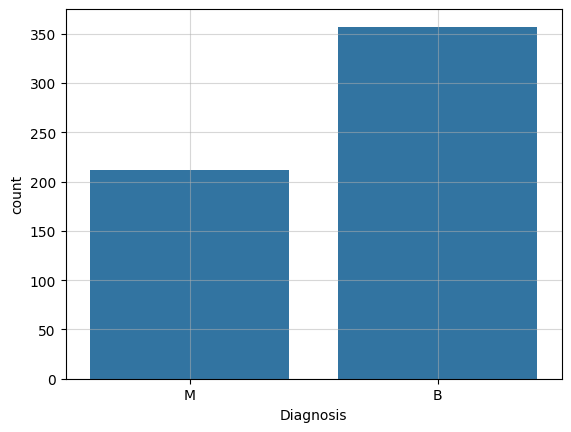

In [89]:
sns.countplot(x='Diagnosis', data=df)
plt.grid(True, alpha = 0.5)
plt.show()

###7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


In [90]:
df['DiagnosisNumeric'] = df['Diagnosis'].map({'B': 0, 'M': 1})
df.head()

,Id,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Diagnosis,DiagnosisNumeric
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M,1


###8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`


In [91]:
for column in df.columns:
  #Leave out categorical columns
  if column != 'Diagnosis' and column != 'DiagnosisNumeric':
    df[column] = (df[column] - df[column].mean()) / df[column].std()
df.head()

,Id,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Diagnosis,DiagnosisNumeric
0,-0.236197,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,M,1
1,-0.236196,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,M,1
2,0.431362,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,M,1
3,0.431741,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,M,1
4,0.431821,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,M,1


###9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.

In [92]:
Columns = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
Names = []

#We get the word for each Column
for title in Columns:
  match = re.match(r'^[A-Z][a-z]+', title).group(0)
  Names.append(match)

#Group them and add a new column taking the mean for each
for names in Names:
  if df.columns.str.startswith(names).any():
    df[names] = df.filter(like=names).mean(axis=1)

df.head()

,Id,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave,Symmetry,Fractal
0,-0.236197,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.822892,-1.331460,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182,2.037172,1.698454
1,-0.236196,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241,-0.349009,-0.228767
2,0.431362,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099,0.775643,0.032286
3,0.431741,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444,4.544703,3.960995
4,0.431821,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.438539,-1.135278,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685,-0.412639,-0.153272


###10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

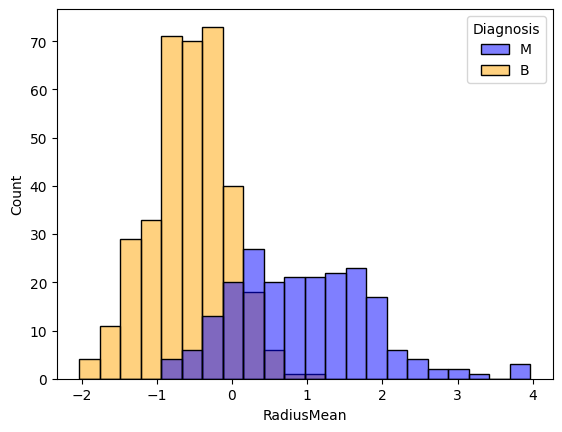

In [93]:
sns.histplot(data=df, x='RadiusMean', hue='Diagnosis', palette=['blue', 'orange'])
plt.show()

###11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


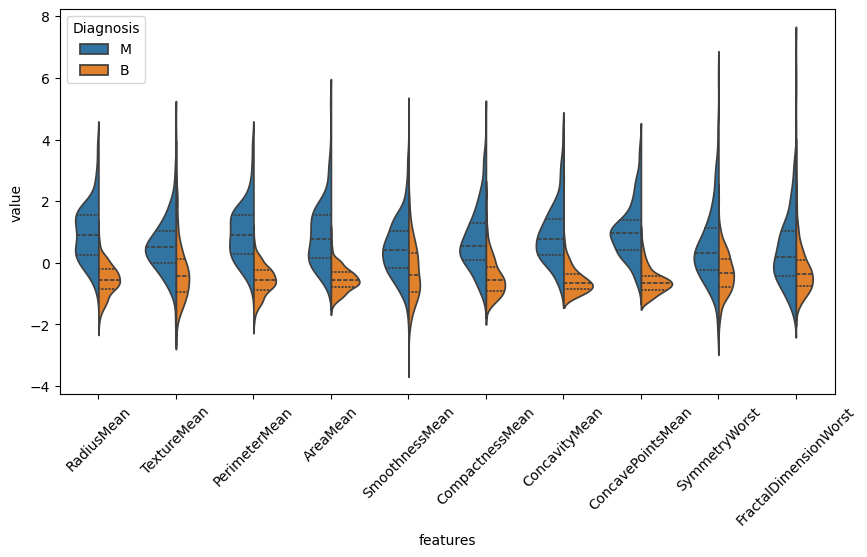

In [94]:
ViolinColumns = ["RadiusMean","TextureMean","PerimeterMean","AreaMean","SmoothnessMean","CompactnessMean","ConcavityMean","ConcavePointsMean","SymmetryWorst", "FractalDimensionWorst"]

plt.figure(figsize=(10,5))
data = pd.melt(df, id_vars="Diagnosis", value_vars= ViolinColumns, var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
plt.show()

###12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

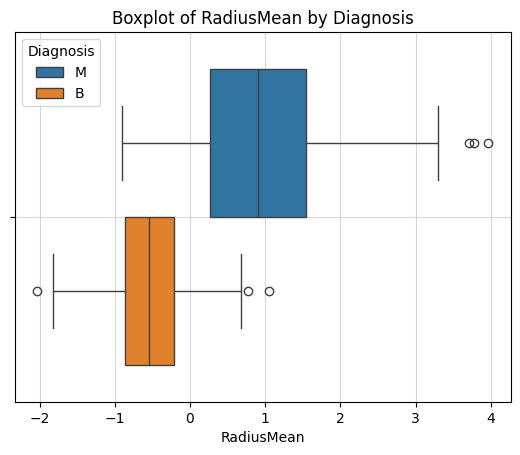

In [95]:
#Graph boxplot
sns.boxplot(data=df, x="RadiusMean", hue='Diagnosis')
plt.grid(True, alpha = 0.5)
plt.title("Boxplot of RadiusMean by Diagnosis")
plt.show()

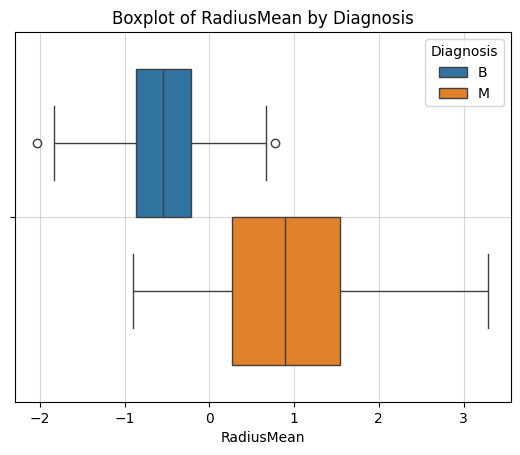

In [96]:
#Clear otliers
cleaned_B = df[df["Diagnosis"] == "B"][np.abs(stats.zscore(df[df["Diagnosis"] == "B"]["RadiusMean"])) < 3]
cleaned_M = df[df["Diagnosis"] == "M"][np.abs(stats.zscore(df[df["Diagnosis"] == "M"]["RadiusMean"])) < 3]

cleaned_df = pd.concat([cleaned_B, cleaned_M])

sns.boxplot(data=cleaned_df, x="RadiusMean", hue='Diagnosis')
plt.grid(True, alpha = 0.5)
plt.title("Boxplot of RadiusMean by Diagnosis")
plt.show()

###13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.


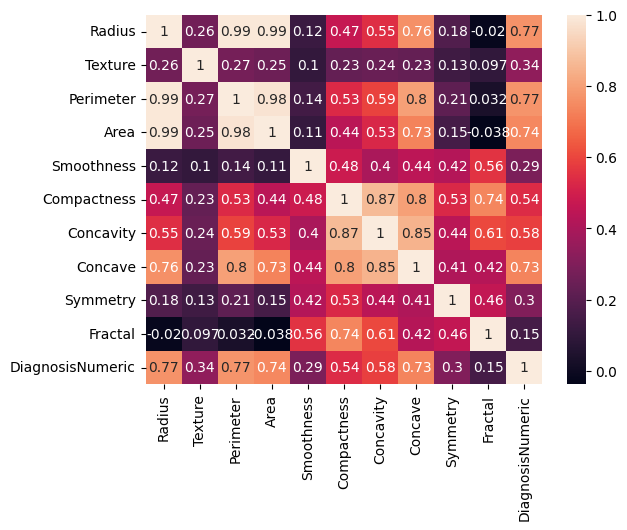

In [97]:
Names.append("DiagnosisNumeric")
corr_matrix = cleaned_df[Names].corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

###14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

Se pueden usar distintos gráficos para entender mejor los datos. Histogramas y KDE muestran la distribución de las características según el diagnóstico; diagramas de caja y violín permiten ver dispersión y valores atípicos; scatterplots muestran relaciones entre características y separación de clases; y un heatmap de correlaciones indica qué variables están más relacionadas entre sí

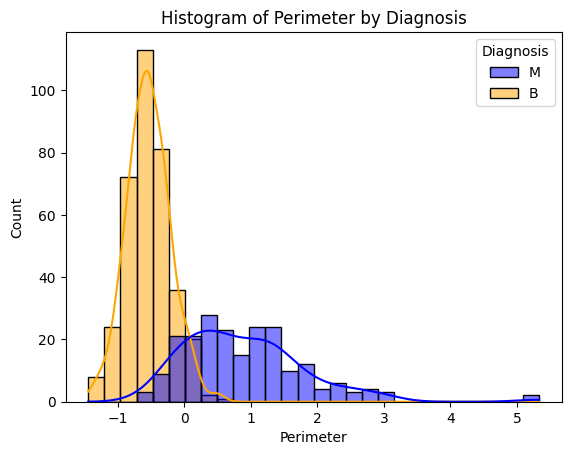

In [98]:
sns.histplot(data=df, x='Perimeter', hue='Diagnosis', palette=['blue', 'orange'], kde=True)
plt.title("Histogram of Perimeter by Diagnosis")
plt.show()

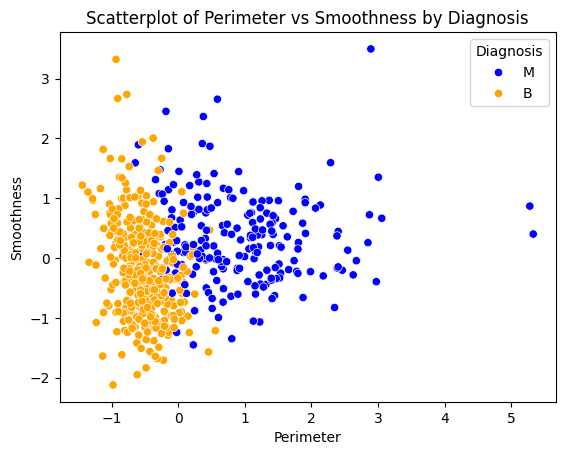

In [99]:
sns.scatterplot(data=df, x='Perimeter', y='Smoothness', hue='Diagnosis', palette=['blue', 'orange'])
plt.title("Scatterplot of Perimeter vs Smoothness by Diagnosis")
plt.show()